<a href="https://colab.research.google.com/github/guigoalmeida/machinelearning-escolavirtual/blob/main/02_Analise_da_EVG_usando_classes_balanceadas%2C_RegLog%2C_Random_Forest_VotingClassifier_e_Arvore_de_Decis%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### DESCRIÇÃO DO EXPERIMENTO

Incluímos aqui todas as variáveis significativas. Buscamos gerar categorias balanceadas, tanto quanto possível, mantendo números assemelhados de casos nas categorias (idade, duração, carga horária). 

Mantivemos apenas os casos de conclusão e de desistência, excluindo os casos de tracamento e reprovação, já que o teste anterior indicou que o modelo não testava essas categorias. 

# Caderno de hipóteses 

Agora que já (1) extraímos e consertamos a tabela original (Caderno 0 - https://colab.research.google.com/drive/12LQasb6_LzJi_R0dRsgSl0u__6Kt3B_y) e criamos um novo CSV livre de NaNs, com todas as colunas originais e mais algumas colunas criadas para auxiliar nas predições (Caderno 1, https://colab.research.google.com/drive/11VLKE-Y4pRjikcX7w8QsMJV7sxDPOtwf#scrollTo=FaoD47dV8ZD2&uniqifier=3), é hora de começar a rodar modelos de IA junto com algumas hipóteses. 

Para isso, vamos seguir usando os modelos que aprendemos em aula. 

O novo CSV tem as seguintes colunas: 

Nome |Descrição |Ação 
---|---|---
* 'Unnamed: 0' | novo índice gerado indevidamente.| NÃO IMPORTAR. 
* 'cod_matricula',| número de registro de cada atividade de matrícula. |NÃO IMPORTAR. 
* 'dt_matricula',| baixo valor preditivo e não usada para gerar outras variáveis.| BAIXO INTERESSE.  
* 'cpf', |- número único poR usuário, com máscara (***.***) cobrindo parte dos registros. |NÃO IMPORTAR 
* 'nome', |v- em princípio, baixo valor preditivo. No futuro, pode ser usada para tentar contar quantas vezes o mesmo usuário já realizou cursos.| BAIXO INTERESSE. 
* 'sexo',| masculino/feminino-| IMPORTAR, CONVERTER PARA DUMMY
* 'data_nascimento',| usada para gerar a variável 'idade', portanto, correlacionada.| NÃO IMPORTAR. 
* 'nacionalidade'|, é uma constante - não há outros países na base. |NÃO IMPORTAR
* 'login_liferay'|, identificação do usuário, com vários valores faltantes |NÃO IMPORTAR
* 'cod_turma'|, número que indica um curso realizado em um determinado período, com os alunos correspondentes. Em princípio, correlacionado com data, e correlacionado com curso. |BAIXO INTERESSE, NÃO IMPORTAR. 
* 'nome_turma'|, Correlacionada diretamente com 'cod_turma' e com todos os problemas relacionados. |BAIXO INTERESSE, NÃO IMPORTAR. 
* 'modalidade_turma'|, todos são da mesma categoria: 'a distancia'. |NÃO IMPORTAR. 
* 'cod_curso',| Código numérico do curso. Diretamente correlacionado com 'nome_curso'. Correlacionado também com 'conteudista', e agregado, com outros cursos, em 'nome_temática'.| BAIXO INTERESSE. IMPORTAR SÓ SE OUTRAS NÃO GERAREM PREDIÇÕES ÚTEIS
* 'nome_curso'|, Nome da disciplina. Diretamente correlacionado com cod_curso'. Correlacionado também com 'conteudista', e agregado, com outros cursos, em 'nome_temática'. |BAIXO INTERESSE. IMPORTAR SÓ SE OUTRAS NÃO GERAREM PREDIÇÕES ÚTEIS
* 'carga_horaria'|, Variável numérica com duração do curso. |IMPORTAR. 
* 'dt_inicio_insc'|, data de início de matrículas, correlacionado com curso correspondente no 'cod_turma'. |BAIXO INTERESSE, NÃO IMPORTAR. 
* 'dt_fim_insc',| data de fim  de matrículas, correlacionado com curso correspondente no 'cod_turma'.| BAIXO INTERESSE, NÃO IMPORTAR. 
* 'dt_inicio',| usada para calcular 'mes_inicio', 'duracao' E 'idade'. |BAIXO INTERESSE, CORRELACIONADA, NÃO IMPORTAR. 
* 'dt_fim', |usada para calcular 'duracao'. |BAIXO INTERESSE, CORRELACIONADA, NÃO IMPORTAR. 
* 'sit_turma'|, divide-se em 'concluída' - situações que podem ser avaliadas, e 'confirmada' - cursos ainda não iniciadas ou em andamento. |USAR COMO FILTRO - EXLCUIR AS 'CONFIRMADAS'. 
* 'sit_matricula',| usada para gerar a variável target 'situação'. No entanto, é mais completa. Se o exercício não for conclusivo, podemos resgatá-la. |BAIXO INTERESSE, IMPORTAR SÓ SE OUTRAS NÃO GERAREM PREDIÇÕES ÚTEIS
* 'poder', |muitos valores vazios, importados como 'Nao declarado'. {'Executivo': 1093704, 'Judiciario': 83105,  'Legislativo': 33811,  'Nao declarado': 1871534}. |BAIXO INTERESSE, IMPORTAR SÓ SE OUTRAS NÃO GERAREM PREDIÇÕES ÚTEIS
* 'esfera'|, muitos valores vazios, importados como 'Nao declarado'. {'Estadual': 642079,  'Federal': 710024,  'Municipal': 436969,  'Nao declarado': 1293082}. |BAIXO INTERESSE, IMPORTAR SÓ SE OUTRAS NÃO GERAREM PREDIÇÕES ÚTEIS
* 'instituicao',| 398 valores diferentes, grande número de não declarados. |BAIXO INTERESSE, IMPORTAR SÓ SE OUTRAS NÃO GERAREM PREDIÇÕES ÚTEIS
* 'municipio_pessoa'|, mais de 5200 valores únicos, usada para gerar a variável 'capital'.| NÃO IMPORTAR. 
* 'uf_pessoa', |+- 28,000 valores  ausentes, importados como 'não declarados'. |IMPORTAR E CONVERTER EM DUMMY
* 'conteudista',| autores dos cursos, 50 valores diferentes.| IMPORTAR E CONVERTER EM DUMMY. PODE PEDIR AGREGAÇÕES, OU MESMO DESCARTE, SE TIVER BAIXO PODER PREDITIVO.  
* 'mes_inicio',| Tabulação mês a mês dos cursos. Substitui várias das variáveis de data.| IMPORTAR, PENSAR EM AGREGAÇÕES (TRIMESTRES?)
* 'duracao',| Duração do curso, calculada a partir de outras variáveis. |IMPORTAR. 
* 'idade',| idade no momento da inscrição, calculada a partir de outras variáveis.| IMPORTAR
* 'capital',| CAPITAL = 1, interior = 0. |IMPORTAR, já é dummy. 
* 'nome_tematica'|, correlacionada com nome curso/cod_curso, mas numa agregação mais palatável.| Importar, converter em dummy. 
* 'situacao'|, variável Target.| IMPORTAR, CONSIDERAR RESGATAR sit_matricula se gerar poucos insights. 

# 1. Importação do novo CSV e ajustes de variáveis


In [1]:
# começamos, como sempre, levantando as bibliotecas necessárias
import time
import pandas as pd
import numpy as np
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
start_time = time.time()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# seguimos importando o dataset, agora já arrumado e limpo. 
#### precisa garantir que exista um arquivo CSV com o nome certo e no lugar certo. 

## CSV disponível em https://drive.google.com/file/d/1e8eWyIKMn12n3aAO7VdOHbaRUuy2XSnf/view?usp=sharing

dataset_trabalhado = '/content/drive/MyDrive/Colab Notebooks/ML_bootcamp/Dados/EVG_completo_corrigido.csv'
df = pd.read_csv(
     dataset_trabalhado,
     sep=',',
     encoding='UTF8', 
     usecols = ['sexo', 'carga_horaria', 'uf_pessoa', 'esfera', 'poder', 
                'conteudista', 'mes_inicio', 'duracao', 'idade', 'capital',
                'nome_tematica', 'sit_turma', 'sit_matricula'])

# Completa os cursos de codigo 291, que estavam sem 'nome_tematica'
df.nome_tematica.fillna('Dados, Informação e Conhecimento', inplace=True) 

# converte duracao para numérico
df['duracao'] = df['duracao'].map(lambda x: int(x.rstrip("days")))

# Converte idade para inteiro
df['idade'] = df['idade'].map(lambda x: int(x) )

# Vamos excluir as turmas que ainda não terminaram: 
df = df.drop(df[df.sit_turma == 'CONFIRMADA          '].index)
df.drop(['sit_turma'], axis=1, inplace=True)

# vamos zerar o index: 
df.reset_index()

# Ajustando a situação da matrícula
df.sit_matricula[df.sit_matricula == 'Desistente'] = 0
df.sit_matricula[df.sit_matricula == 'Concluida'] = 1

### teste 3
df = df.drop(df[df.sit_matricula == 'Reprovado'].index)
df = df.drop(df[df.sit_matricula == 'Trancada'].index)

#teste 1
# df.sit_matricula[df.sit_matricula == 'Reprovado'] = 2 
# df.sit_matricula[df.sit_matricula == 'Trancada'] = 3

## teste 2
# df.sit_matricula[(df.sit_matricula == 'Reprovado') | (df.sit_matricula == 'Trancada')] = 2

df.sit_matricula = list(pd.Series(df.sit_matricula).astype(int))


df.duracao[df.duracao <= 21] = 20
df.duracao[(df.duracao > 21) & (df.duracao <=30)] = 30
df.duracao[(df.duracao > 31) & (df.duracao <=45)] = 40
df.duracao[(df.duracao > 45) & (df.duracao <=50)] = 50
df.duracao[(df.duracao > 50) & (df.duracao <=60)] = 60
df.duracao[(df.duracao > 60) & (df.duracao <=70)] = 70
df.duracao[df.duracao > 70] = 100
df.duracao.value_counts().to_dict()

'''
estabelecendo carga horária mais balanceada. 

ANTIGA: 
df.carga_horaria[df.carga_horaria< 20] = 20
df.carga_horaria[(df.carga_horaria > 20) & (df.carga_horaria < 40)] = 40
df.carga_horaria[(df.carga_horaria > 40) & (df.carga_horaria < 100)] = 90
df.carga_horaria[df.carga_horaria > 100] = 100
#categorias de carga horária 
# {20: 1466085, 40: 890947, 90: 295673, 100: 97496}

NOVA DISTRIBUIÇÃO: 
{10: 327508, 20: 1138577, 30: 418125, 40: 472822, 60: 291167, 100: 102002}
'''
df.carga_horaria[df.carga_horaria<= 15] = 10
df.carga_horaria[(df.carga_horaria > 15) & (df.carga_horaria<= 20)] = 20
df.carga_horaria[(df.carga_horaria > 20) & (df.carga_horaria <= 36)] = 30
df.carga_horaria[(df.carga_horaria > 36) & (df.carga_horaria <= 40)] = 40
df.carga_horaria[(df.carga_horaria > 40) & (df.carga_horaria <= 60)] = 60
df.carga_horaria[df.carga_horaria > 60] = 100
# df.carga_horaria.value_counts().to_dict()

'''
IDADE - regrupando as faixas em busca de distribuição mais homogênea :
anterior: 
20 (jovens)
20 a 45 Adultos
45 a 59 maduros
+60 idosos
distribuição: 
{20: 161359, 45: 1929598, 59: 452553, 60: 68519}

Novo: 
distribuição: 
{20: 161359,  25: 369181,  30: 390067,  35: 444258,  40: 423197,  50: 522378,  60: 301589}
'''
df.idade.value_counts().to_dict() 
df.idade[df.idade <= 20]  = 20 #jovens
df.idade[(df.idade > 20) & (df.idade <= 25)] = 25 # de 21 a 25 
df.idade[(df.idade > 25) & (df.idade <= 30)] = 30 # de 26 a 30 
df.idade[(df.idade > 30) & (df.idade <= 35)] = 35 # de 31 a 35 
df.idade[(df.idade > 35) & (df.idade <= 40)] = 40 # de 36 a 40 
df.idade[(df.idade > 40) & (df.idade < 50)] = 50 # de 41 a 50 maduros
df.idade[(df.idade > 50)] = 60 #idosos + 50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to b

## Criando recorte para os meses

In [ ]:
from datetime import datetime as dt
df['mes'] = df.mes_inicio.apply(lambda x: int(x[5:])).astype('int32') # Criando coluna com só o mês
df['trimestre'] = (df.mes - 1) // 3 # Criando coluna por semestre

In [ ]:
df

In [9]:
# Dividindo o mes_inicio em 6 categorias separadas

# converte mes_inicio para numérico
from datetime import datetime as dt
df['mes_inicio'] = pd.to_datetime(df['mes_inicio'], format = "%Y-%m")
df['mes_inicio']=df['mes_inicio'].map(dt.toordinal)
df['periodos'] = pd.cut(df.mes_inicio, bins=6)
#df.drop(['mes_inicio'], axis=1, inplace=True)
df.head()

,sexo,carga_horaria,sit_matricula,poder,esfera,uf_pessoa,conteudista,mes_inicio,duracao,idade,capital,nome_tematica,mes,trimestre,periodos
0,masculino,10,0,Nao declarado,Nao declarado,CE,NUTEAD - UEPG,737211,30,30,0,"Dados, Informação e Conhecimento",6,1,"(737060.667, 737228.0]"
2,masculino,30,1,Nao declarado,Nao declarado,CE,STN,737211,40,30,0,Orçamento e Finanças,6,1,"(737060.667, 737228.0]"
3,masculino,60,1,Nao declarado,Nao declarado,CE,RFB,737211,60,30,0,Desenvolvimento Gerencial,6,1,"(737060.667, 737228.0]"
4,masculino,20,0,Nao declarado,Nao declarado,CE,RFB,737211,30,30,0,Auditoria e Controle,6,1,"(737060.667, 737228.0]"
5,masculino,20,1,Nao declarado,Nao declarado,CE,CNJ,737211,30,30,0,Gestão Estratégica,6,1,"(737060.667, 737228.0]"


In [11]:
# X_total =  df[['sexo', 'carga_horaria', 'uf_pessoa', 'esfera', 'poder',
#                 'conteudista',  'duracao', 'mes_inicio', 'idade', 'capital',
#                 'nome_tematica', 'mes', 'trimestre', 'periodos']]#.reset_index() 
# y_total = df.sit_matricula#.reset_index()
# #X_total, y_total
# X_total_train, X_total_test, y_total_train, y_total_test = train_test_split(X_total, y_total, test_size=0.2, random_state=42)

## 1.1 Vale criar uma base menor para conseguir trabalhar mais rápido

In [11]:
df_sample = df.sample(n=1000000, random_state=42)
#df_sample

## 2. Padronização do dataframe - dummies para categóricas, ordinal encoder para categorias sequenciais, normalização para numéricas


In [12]:
# ORDINAL ENCODER DA CARGA HORÁRIA
from sklearn.preprocessing import OrdinalEncoder
enc1 = OrdinalEncoder()
#mudar para df para usar a base toda
df_sample['carga_horaria']= enc1.fit_transform(df_sample[['carga_horaria']])
#df_sample['carga_horaria']

# ORDINAL ENCODER DA IDADE
#mudar para df para usar a base toda
df_sample['idade']= enc1.fit_transform(df_sample[['idade']])
#df_sample['idade']

# ORDINAL ENCODER MÊS
df_sample['mes']= enc1.fit_transform(df_sample[['mes']])
#df_sample['mes']

# ORDINAL ENCODER TRIMESTRE
df_sample['trimestre']= enc1.fit_transform(df_sample[['trimestre']])

# ORDINAL ENCODER duracao
df_sample['duracao']= enc1.fit_transform(df_sample[['duracao']])

########################################################################
# LABEL ENCODER DO PERIODO
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_sample['periodos'] = le.fit_transform(df_sample.periodos)
df_sample['periodos']

########################################################################
## dummy para as categóricas criada com o One Hot Encoder, colocando nome nas colunas
from sklearn.preprocessing import  OneHotEncoder
encoder = OneHotEncoder(sparse=False)
# mudar de df_sample para df se for usar a base toda
df_cat_encoded = encoder.fit_transform(df_sample[['sexo', 'uf_pessoa', 'conteudista', 'nome_tematica', 'esfera', 'poder']])
column_name = encoder.get_feature_names(['sexo', 'uf_pessoa', 'conteudista', 'nome_tematica', 'esfera', 'poder'])
df_ohe_labeled = pd.DataFrame(df_cat_encoded, columns= column_name)
#df_ohe_labeled

######################################################################
# Normalização para  as variáveis numéricas da base - mes_inicio: 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# mudar de df_sample para df se for usar a base toda
scaled_data = scaler.fit_transform(df_sample[[ 'mes_inicio']])
df_scaled = pd.DataFrame(scaled_data, columns=[ 'mes_inicio'])
#df_scaled

In [13]:
# CARGA COMO SÉRIE
carga_ = df_sample['carga_horaria'].reset_index()
carga_series = carga_['carga_horaria']
# IDADE COMO SERIE 
idade_ = df_sample['idade'].reset_index()
idade_series = idade_['idade']
# tentando colocar capital, como series - mas está explodindo a memória. Ficar sem capital por enquanto.
# DURACAO COMO SERIE 
duracao_ = df_sample['duracao'].reset_index()
duracao_series = duracao_['duracao']

#  MÊS COMO SERIE
mes_ =  df_sample['mes'].reset_index()
mes_series = mes_['mes']

#  TRIMESTRE COMO SERIES
trimestre_ =  df_sample['trimestre'].reset_index()
trimestre_series = trimestre_['trimestre']

# PERIODOS COMO SÉRIES
# periodo_ = df_sample['periodos'].reset_index()
# periodo_series = periodo_['periodos']

# mudar de df_sample para df se for usar a base toda
capital_ = df_sample['capital'].reset_index()
capital_series=capital_['capital']

# Juntando as dummies categoricas com as numericas normalizadas e com 'capital'
frames = [df_ohe_labeled, df_scaled, capital_series, idade_series, carga_series, duracao_series, mes_series, trimestre_series]#
# frames = [df_ohe_labeled, df_scaled]
result = pd.concat(frames, axis = 1)
#result

In [14]:
result

,sexo_feminino,sexo_masculino,sexo_outro,uf_pessoa_AC,uf_pessoa_AL,uf_pessoa_AM,uf_pessoa_AP,uf_pessoa_BA,uf_pessoa_CE,uf_pessoa_DF,uf_pessoa_ES,uf_pessoa_GO,uf_pessoa_MA,uf_pessoa_MG,uf_pessoa_MS,uf_pessoa_MT,uf_pessoa_Nao declarado,uf_pessoa_PA,uf_pessoa_PB,uf_pessoa_PE,uf_pessoa_PI,uf_pessoa_PR,uf_pessoa_RJ,uf_pessoa_RN,uf_pessoa_RO,uf_pessoa_RR,uf_pessoa_RS,uf_pessoa_SC,uf_pessoa_SE,uf_pessoa_SP,uf_pessoa_TO,conteudista_(011).lab,conteudista_AECI/MP,conteudista_AGU,conteudista_ANVISA,conteudista_Ancine,conteudista_BID,conteudista_Banco Central do Brasil,conteudista_CADE,conteudista_CEPERJ,...,conteudista_SOF,conteudista_SPI/MPDG,conteudista_SPU,conteudista_STI/MPDG,conteudista_STN,conteudista_TCE/RJ,conteudista_TCU,conteudista_Unicorreios,conteudista_Universidade de Tecnologia de Delft,nome_tematica_Auditoria e Controle,"nome_tematica_Dados, Informação e Conhecimento",nome_tematica_Desenvolvimento Gerencial,nome_tematica_Educação e Docência,nome_tematica_Gestão Estratégica,nome_tematica_Gestão de Pessoas,nome_tematica_Gestão de Políticas Públicas,nome_tematica_Governança e Gestão de Riscos,nome_tematica_Governo Digital e Transparência,nome_tematica_Inovação,nome_tematica_Logística e Compras Públicas,nome_tematica_Orçamento e Finanças,nome_tematica_Políticas Públicas Setoriais,nome_tematica_Tecnologia da Informação,nome_tematica_Transferências de Recursos da União,nome_tematica_Ética e Cidadania,esfera_Estadual,esfera_Federal,esfera_Municipal,esfera_Nao declarado,poder_Executivo,poder_Judiciario,poder_Legislativo,poder_Nao declarado,mes_inicio,capital,idade,carga_horaria,duracao,mes,trimestre
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.259196,1,4.0,2.0,2.0,7.0,2.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.685422,0,2.0,1.0,0.0,7.0,2.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.573095,0,1.0,2.0,2.0,2.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.138064,0,4.0,3.0,3.0,8.0,2.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.380328,0,1.0,0.0,1.0,6.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.217515,0,0.0,1.0,1.0,11.0,3.0
999996,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.

#3. AQUI COMEÇA A EXPLORAÇÃO

## 3.1. Criar X e y


In [17]:
# Agora é hora de separar o dataset em dados e target, *assumindo que a coluna target é a última*
X = result
y = df_sample.sit_matricula
X.shape, y.shape

((1000000, 109), (1000000,))

## 3.2. Separação em treino e teste: 

In [20]:
# separar em datasets de treino e de teste 

# se for com os dados completos, mudar *df_sample* para *df*
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = df_sample.sit_matricula, test_size=0.2, random_state=42)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800000, 109), (200000, 109), (800000,), (200000,))

## 4 Modelos

In [22]:
# Regressão Logística
from sklearn.linear_model import LogisticRegression

reg_log = LogisticRegression(solver='lbfgs').fit(X_train, y_train)
reg_log.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.61919

In [23]:
from sklearn.metrics import classification_report
y_predict = reg_log.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.63      0.67      0.65    104193
           1       0.61      0.57      0.59     95807

    accuracy                           0.62    200000
   macro avg       0.62      0.62      0.62    200000
weighted avg       0.62      0.62      0.62    200000



In [36]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
import numpy as np
rf_class = RandomForestClassifier(n_estimators=120, max_depth=20, random_state=100).fit(X_train, y_train)
rf_class.score(X_test, y_test)

0.638715

In [37]:
from sklearn.metrics import classification_report
y_predict = rf_class.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.65      0.68      0.66    104193
           1       0.63      0.60      0.61     95807

    accuracy                           0.64    200000
   macro avg       0.64      0.64      0.64    200000
weighted avg       0.64      0.64      0.64    200000



In [38]:
# Voting Classifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
clf1 = LogisticRegression(solver='lbfgs', random_state=1, max_iter=200)
clf2 = RandomForestClassifier(n_estimators=120, max_depth=20, random_state=100)
clf3 = GaussianNB()
eclf2 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2)], voting='soft')
eclf2 = eclf2.fit(X, y)
eclf2.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.65904

In [39]:
y_predict = eclf2.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.66      0.70      0.68    104193
           1       0.65      0.62      0.63     95807

    accuracy                           0.66    200000
   macro avg       0.66      0.66      0.66    200000
weighted avg       0.66      0.66      0.66    200000



In [40]:
print("--- %s seconds ---" % (time.time() - start_time))

--- 1066.2806973457336 seconds ---


## Árvore de decisão, visualizada

In [24]:
# Árvore de decisão
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf = DecisionTreeClassifier(max_depth=4).fit(X_train, y_train)
clf.score(X_test, y_test)

0.592315

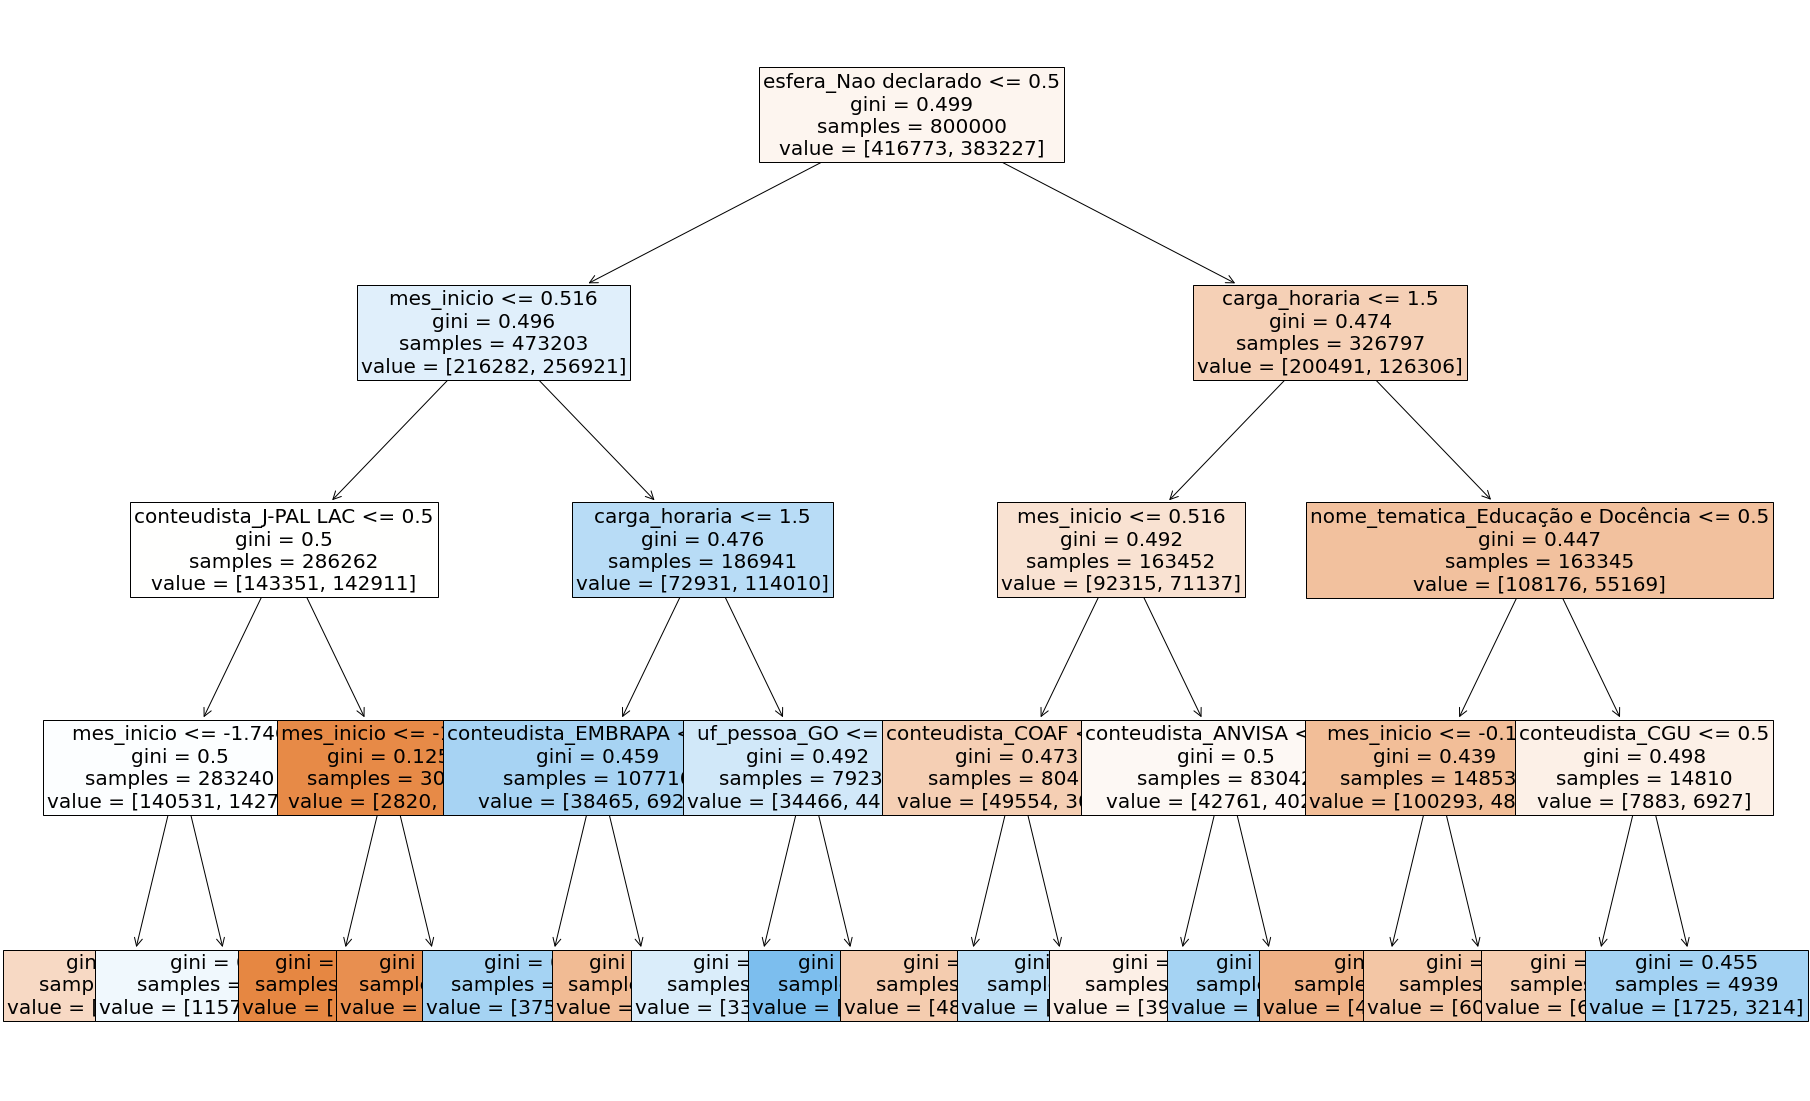

In [25]:
plt.figure(figsize=(30,20))
plot_tree(clf, filled=True, fontsize=20, feature_names=X.columns)
plt.show()

In [26]:
# pip install graphviz dtreeviz

import sys

if 'google.colab' in sys.modules:
  !pip install -q dtreeviz

In [27]:
from sklearn.datasets import *
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

from sklearn import tree

import os
#add library module to PYTHONPATH
sys.path.append(f"{os.getcwd()}/../") # <- pôr path para os binários do graphviz

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


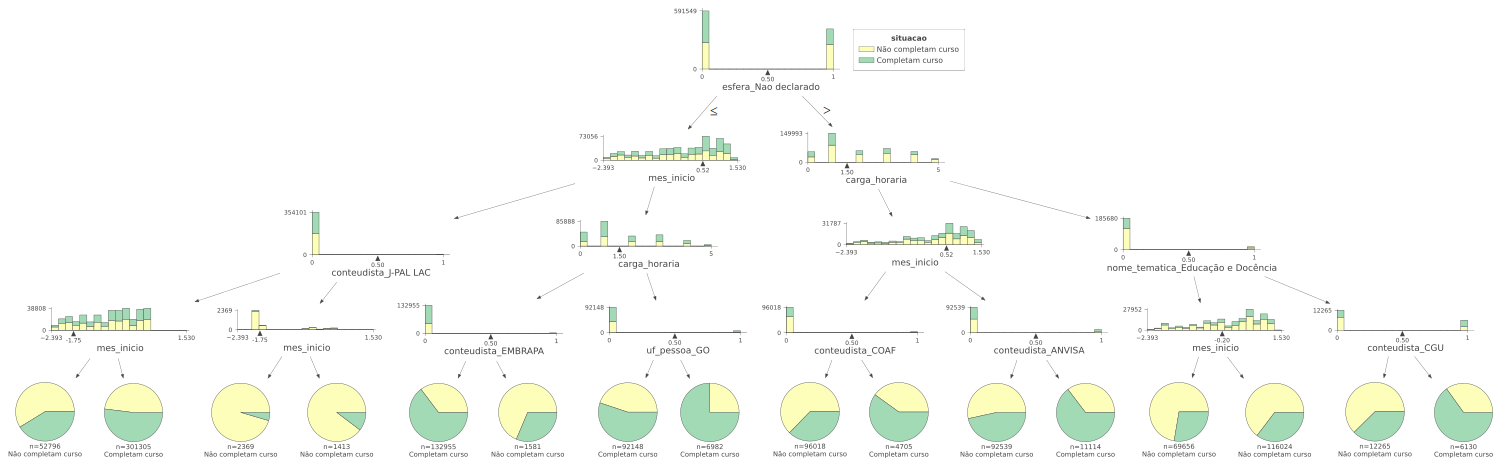

In [28]:
viz = dtreeviz(clf, X, y,
                target_name="situacao",
                feature_names=X.columns,
                class_names= ["Não completam curso", "Completam curso"])

viz.save('evg_map.svg')
viz

NameError: ignored